------------------------------------------------------------------------------------------------------------
Number of Ticks = 1000
Number of simulations:  500

Pi median Ratio:  0.9344780488365124
Wa median Ratio:  0.7835809129691653

Expected Teta = 4*Ne*mu =  2.5e-05
Median Pi Autosome:  6.572065e-06
Median Wa Autosome:  1.3270400000000001e-05


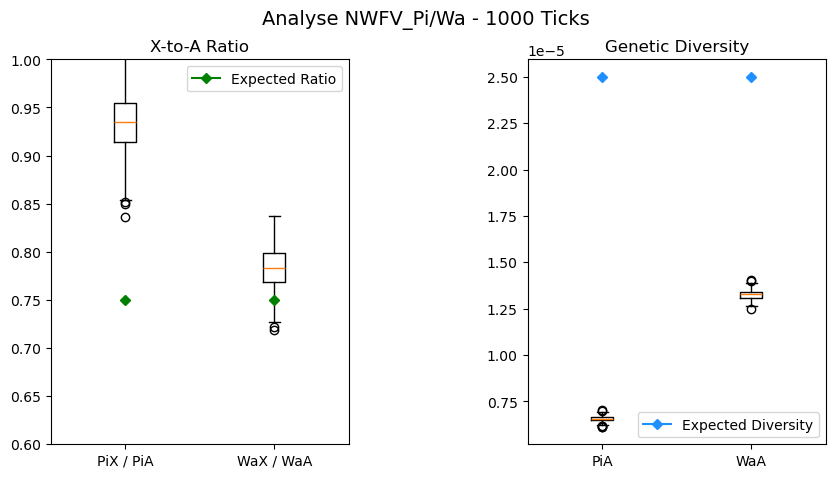

------------------------------------------------------------------------------------------------------------
Number of Ticks = 5000
Number of simulations:  500

Pi median Ratio:  0.7990033963411075
Wa median Ratio:  0.7697891883003827

Expected Teta = 4*Ne*mu =  2.5e-05
Median Pi Autosome:  1.6393399999999998e-05
Median Wa Autosome:  1.7362700000000002e-05


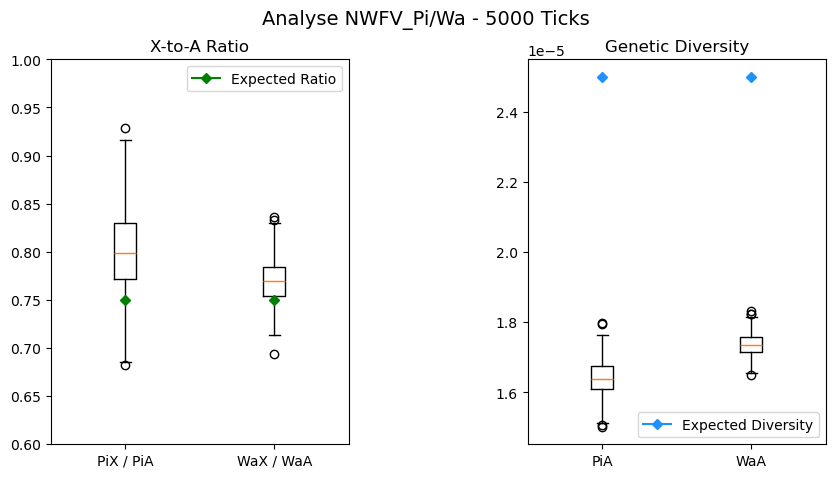

------------------------------------------------------------------------------------------------------------
Number of Ticks = 10000
Number of simulations:  500

Pi median Ratio:  0.7599099558127522
Wa median Ratio:  0.7514899846816412

Expected Teta = 4*Ne*mu =  2.5e-05
Median Pi Autosome:  1.82068e-05
Median Wa Autosome:  1.811285e-05


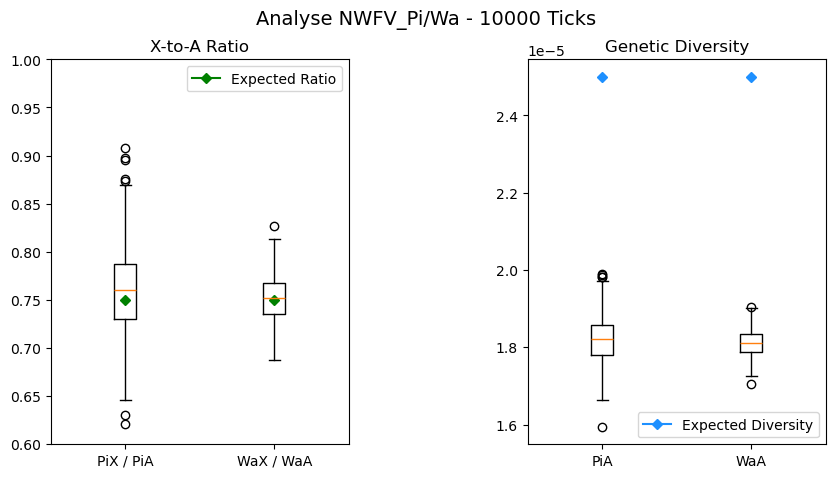

------------------------------------------------------------------------------------------------------------
Number of Ticks = 20000
Number of simulations:  500

Pi median Ratio:  0.7456156923943045
Wa median Ratio:  0.7488024736627429

Expected Teta = 4*Ne*mu =  2.5e-05
Median Pi Autosome:  1.8496549999999998e-05
Median Wa Autosome:  1.8213299999999997e-05


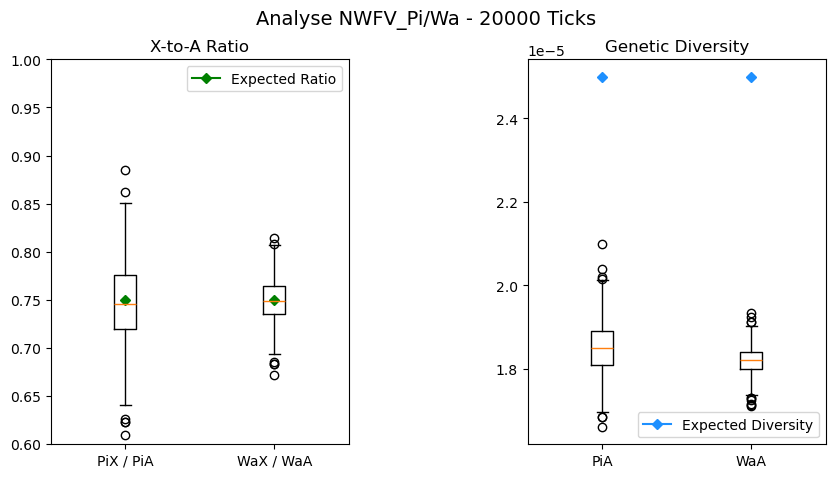

------------------------------------------------------------------------------------------------------------
Number of Ticks = 50000
Number of simulations:  500

Pi median Ratio:  0.7448520807799361
Wa median Ratio:  0.7494078628744463

Expected Teta = 4*Ne*mu =  2.5e-05
Median Pi Autosome:  1.8459900000000003e-05
Median Wa Autosome:  1.817545e-05


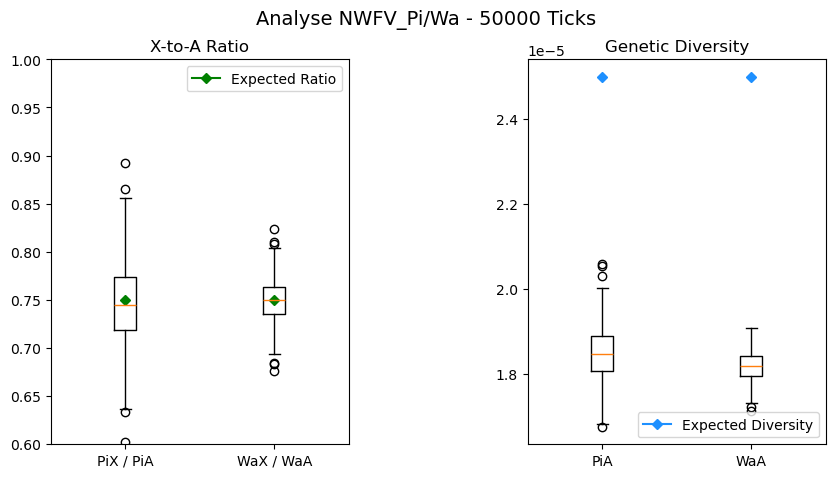

In [9]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWFV_PiWa_TICKS/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWFV_PiWa_TICKS/"
Lticks=[1000,5000,10000,20000,50000]
expected_ratio = 0.75
expected_teta = round (4*500*1.25e-8,10)

for NTICKS in Lticks:
    Pi_ratio = []
    Wa_ratio = []
    PiA = []
    WaA = []
    for NUM in range(1,501):
        File = FOLDER+"NWFV_PiWa_NTicks"+str(NTICKS)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            Pi_ratio.append(float(Values[1])/float(Values[0]))
            Wa_ratio.append(float(Values[4])/float(Values[3]))
            PiA.append(float(Values[0]))
            WaA.append(float(Values[3]))
            Text.close()
            
    Pi_median = np.median(Pi_ratio)
    Wa_median = np.median(Wa_ratio)
    PiA_mean = np.median(PiA)
    WaA_mean = np.median(WaA)
    print("------------------------------------------------------------------------------------------------------------")
    print("Number of Ticks = "+str(NTICKS))
    print("Number of simulations: ",len(Pi_ratio))
    print()
    print("Pi median Ratio: ",Pi_median)
    print("Wa median Ratio: ",Wa_median)
    print()
    print("Expected Teta = 4*Ne*mu = ", expected_teta )
    print("Median Pi Autosome: ",PiA_mean)
    print("Median Wa Autosome: ",WaA_mean)
    
    fig, ax = mp.subplots(1,2,figsize=(10, 5))
    fig.subplots_adjust(wspace=0.6)
    fig.suptitle(f"Analyse NWFV_Pi/Wa - {NTICKS} Ticks", fontsize=14)
    
    ax[0].boxplot([Pi_ratio,Wa_ratio],tick_labels=["PiX / PiA","WaX / WaA"])
    ax[0].set_title("X-to-A Ratio")
    ax[0].set_ylim([0.6, 1])
    ax[0].plot(1, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
    ax[0].plot(2, expected_ratio, marker='D', color='green', markersize=5)
    ax[0].legend()
    
    ax[1].boxplot([PiA,WaA],tick_labels=["PiA","WaA"])
    ax[1].set_title("Genetic Diversity")
    #ax[1].set_ylim([2.2e-5, 2.8e-5])
    ax[1].plot(1, expected_teta, marker='D', color='dodgerblue', markersize=5, label='Expected Diversity')
    ax[1].plot(2, expected_teta, marker='D', color='dodgerblue', markersize=5)
    ax[1].legend()

    fig.savefig(FOLDER_output+'NWFV_PiWa_Ticks'+str(NTICKS)+'.png') 

    mp.show()

